In [52]:
import numpy as np 
import pandas as pd
import os
import csv
from sklearn import linear_model
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [2]:
path_csv = "C:\\Users\\krish\\Desktop\\New folder (3)\\imports-85.data"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
with open("C:\\Users\\krish\\Desktop\\New folder (3)\\imports-85.data") as data_read:
    read_line=csv.reader(data_read)
    lines=list(read_line)   

In [5]:
def mean(a):
    t=headers.index(a)
    sum=0
    total=0
    for i in lines:
        temp=i[t]
        if temp != "?":
            sum=sum+float(temp)
            total=total+1
    return sum/total

In [6]:
def maximum(a):
    t=headers.index(a)
    temp=[]
    for i in lines:
        temp += [i[t]]      
    return max(temp)

In [7]:
def remove(a):
    t=headers.index(a)
    index=[]
    for i in lines:
        temp=i[t]
        if temp == "?":
            index.append(i)
    for x in index:
        lines.remove(x)

In [8]:
def replace(a,mean):
    t=headers.index(a)
    
    for i in lines:
        temp=i[t]
        if temp == "?":
            i[t]=mean
    

In [9]:
mean_normalized_losses = int(mean("normalized-losses"))
mean_stroke = mean("stroke")
mean_bore = mean("bore")
mean_horsepower = int(mean("horsepower"))
mean_peak_rpm = mean("peak-rpm")
frequency_num_of_doors = maximum("num-of-doors")

replace("normalized-losses",mean_normalized_losses)
replace("stroke",mean_stroke)
replace("bore",mean_bore)
replace("horsepower",mean_horsepower)
replace("peak-rpm",mean_peak_rpm)
replace("num-of-doors",frequency_num_of_doors)
remove("price")
print("Length of new data",len(lines)) #after deletion of ? prices

Length of new data 201


In [26]:
def find(x):
    new_x =[]
    t=headers.index(x)
    for k in lines: 
        new_x += [float(k[t])]
        
    return new_x 

In [28]:
stroke = find("stroke")
price = find("price")

[2.68, 2.68, 3.47, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 2.8, 2.8, 3.19, 3.19, 3.19, 3.39, 3.39, 3.39, 3.03, 3.11, 3.11, 3.23, 3.23, 3.39, 3.23, 3.23, 3.23, 3.39, 3.46, 3.9, 3.41, 3.41, 3.07, 3.41, 3.41, 3.41, 3.41, 3.58, 3.58, 3.58, 3.58, 3.58, 3.58, 3.23, 3.23, 4.17, 4.17, 2.76, 3.15, 3.15, 3.15, 3.15, 3.15, 3.2554228855721337, 3.2554228855721337, 3.2554228855721337, 3.2554228855721337, 3.39, 3.39, 3.39, 3.39, 3.39, 3.39, 3.16, 3.64, 3.64, 3.64, 3.64, 3.64, 3.1, 3.1, 3.35, 3.35, 3.12, 3.23, 3.23, 3.23, 3.39, 3.46, 3.46, 3.86, 3.86, 3.86, 3.46, 3.46, 3.46, 3.46, 3.29, 3.47, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.47, 3.47, 3.27, 3.27, 3.27, 3.27, 3.27, 3.27, 3.19, 3.52, 3.19, 3.52, 2.19, 3.52, 2.19, 3.52, 3.19, 3.52, 3.21, 3.23, 3.39, 3.23, 3.23, 3.23, 3.46, 3.86, 3.11, 2.9, 2.9, 2.9, 3.9, 3.9, 3.07, 3.07, 2.07, 3.07, 3.07, 3.07, 2.36, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.35, 3.35, 3.03, 3.03, 3.03, 3.03,

In [48]:
training_x = np.array(stroke).reshape(-1, 1)
training_y = np.array(price)
model = linear_model.LinearRegression()
# perform linear fit/regression
model.fit(training_x, training_y)
# turn coefficient array which contains only one number into a number
slope = np.asscalar(np.squeeze(model.coef_))
intercept = model.intercept_
print('slope: ', slope, 'intercept: ', intercept)

slope:  2068.6739920082555 intercept:  6469.718633642275


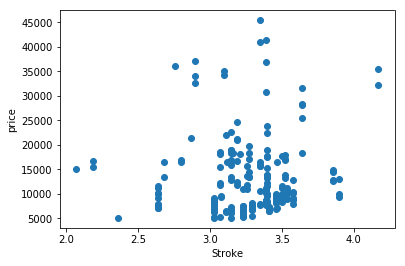

In [49]:
model = LinearRegression()
model.fit(training_x, training_y)

ax = plt.axes()
ax.scatter(training_x, training_y)


ax.set_xlabel('Stroke')
ax.set_ylabel('price')

ax.axis('tight')

plt.show()

In [56]:
from bokeh.models import Slope
source = ColumnDataSource(data=dict(
    x=stroke,
    y=price,
    
))

# add tooltips to show infos for each datapoint
tooltips = [
    
    ('Stroke', '$x'),
    ('price', '$y{$0}')
]

# create figure
p = figure(plot_width=600, plot_height=400, tooltips=tooltips)
# add axis labels
p.xaxis.axis_label = 'stroke'
p.yaxis.axis_label = 'Price'

# show datapoints as circles
p.circle('x', 'y', source=source, size=8, color='blue', alpha=0.5)




best_fit = Slope(gradient=slope, y_intercept=intercept, line_color='red', line_width=3)
p.add_layout(best_fit)
show(p)
